 # Cantilevered Beam with an Eccentric Mass - Tabletop Experiment

In [210]:
import json
import pandas
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple
from os import path
from glob import glob
from matplotlib.lines import Line2D as mlines

%matplotlib notebook

experiment = namedtuple('experiment', ['run1', 'run2', 'run3'])

Fs = 50 

experiments = dict()

data_dir = '../../data/experiment/'
results_dir = '../../results/experiment/'

In [222]:
for directory in sorted(glob(path.join(data_dir, '10-cm_?-screws'))):
    key = directory.split('_')[1]
    print (key)
    experiments[key] = list()
    
    for data_file in glob(path.join(directory, '*.json')):
        print(data_file)
        with open(data_file, 'r') as data_file_handler:
            data = list()
            
            for line in data_file_handler.readlines():
                try:
                    data.append(json.loads(line))
                except:
                    print('failed to parse json')
                    
            data_df = pd.DataFrame(
                [[d['timestamp'], d['linear_acceleration']['x'], d['linear_acceleration']['y'], d['linear_acceleration']['z'], d['rotational_acceleration']['y'], d['rotational_acceleration']['x'], d['rotational_acceleration']['z']] for d in data],
                columns=['timestamp', 'acc_x', 'acc_y', 'acc_z', 'rot_x', 'rot_y', 'rot_z']
            )
            
            data_df.timestamp = pd.to_datetime(data_df.timestamp, unit='s', utc=True)
            data_df.set_index('timestamp', inplace=True)
            data_df.sort_index(inplace=True)
            data_df = data_df[~data_df.index.duplicated(keep='first')]
            data_df = data_df.resample('20ms').ffill()[1:]
            
            experiments[key].append(data_df)

0-screws
../../data/experiment/10-cm_0-screws/mass-eccentricity_2021-07-dT23:24:10+0200.json
../../data/experiment/10-cm_0-screws/mass-eccentricity_2021-07-dT23:19:35+0200.json
../../data/experiment/10-cm_0-screws/mass-eccentricity_2021-07-dT23:29:04+0200.json
2-screws
../../data/experiment/10-cm_2-screws/mass-eccentricity_2021-07-dT22:50:37+0200.json
../../data/experiment/10-cm_2-screws/mass-eccentricity_2021-07-dT22:45:05+0200.json
../../data/experiment/10-cm_2-screws/mass-eccentricity_2021-07-dT22:39:26+0200.json
4-screws
../../data/experiment/10-cm_4-screws/mass-eccentricity_2021-07-dT23:12:37+0200.json
../../data/experiment/10-cm_4-screws/mass-eccentricity_2021-07-dT23:07:42+0200.json
../../data/experiment/10-cm_4-screws/mass-eccentricity_2021-07-dT23:03:18+0200.json


<IPython.core.display.Javascript object>


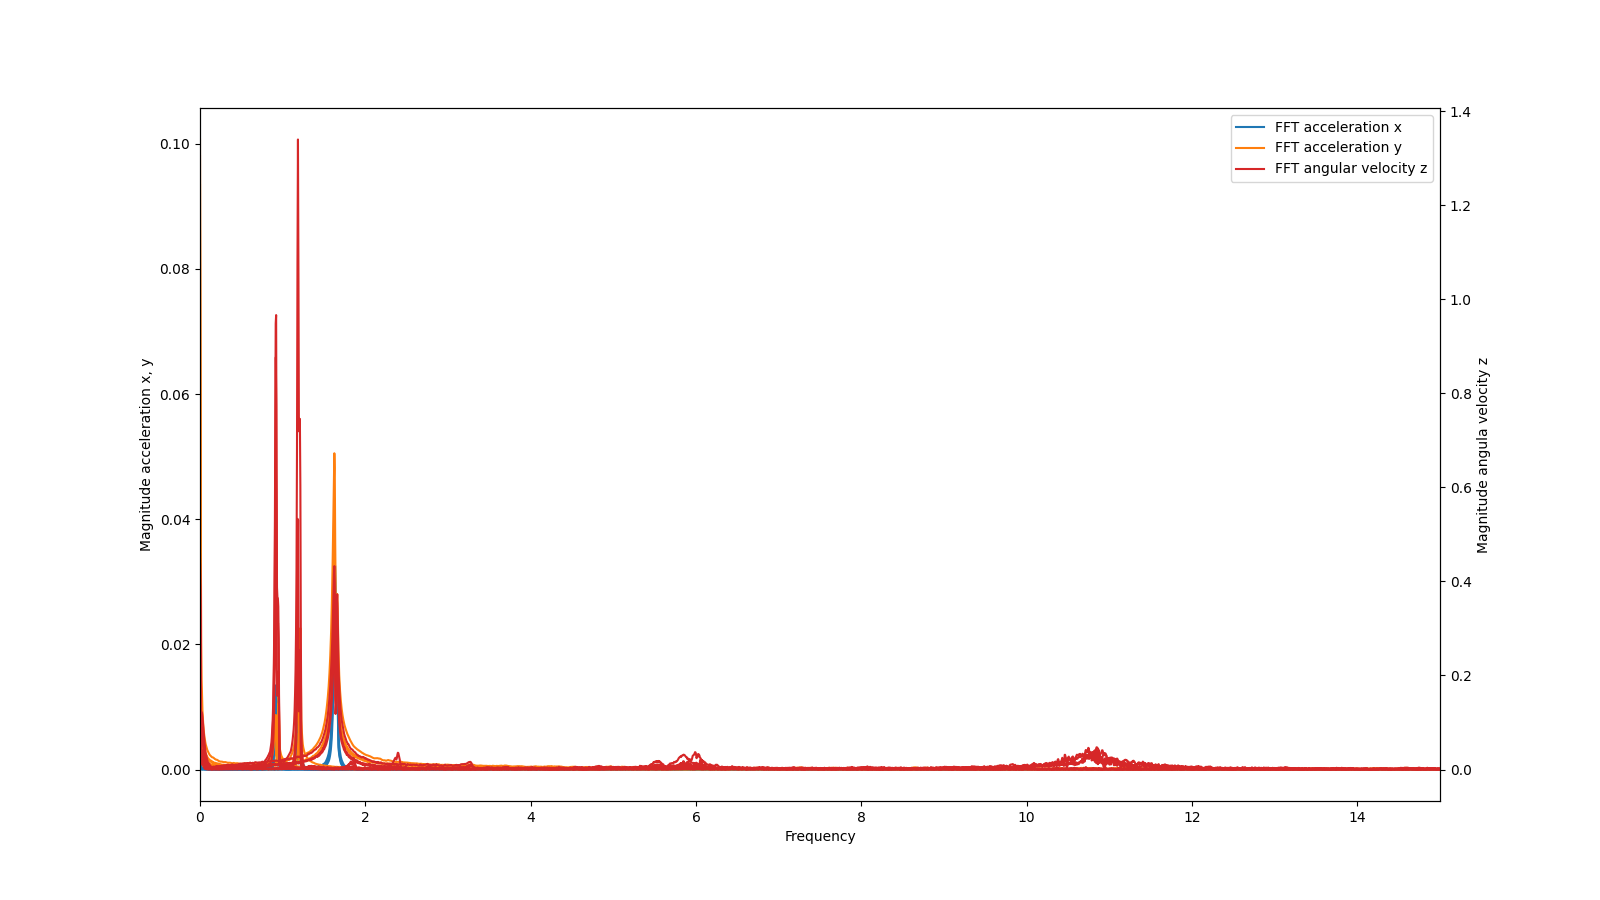

In [258]:
fig = plt.figure(figsize=(16,9))
ax1 = plt.gca()
ax2 = plt.gca().twinx()
for key, data_l in experiments.items():
    for df in data_l:
        
        ax2.magnitude_spectrum(df.rot_z, Fs=Fs, color='tab:red')
        
        ax1.magnitude_spectrum(df.acc_x, Fs=Fs, color='tab:blue')
        ax1.magnitude_spectrum(df.acc_y, Fs=Fs, color='tab:orange')
                
ax1.set_xlim([0, 15])
ax1.set_ylabel('Magnitude acceleration x, y')
ax2.set_ylabel('Magnitude angula velocity z')
        
ax1.legend(handles = [mlines([0], [0], color='tab:blue', label='FFT acceleration x'), mlines([0], [0], color='tab:orange', label='FFT acceleration y'), mlines([0], [0], color='tab:red', label='FFT angular velocity z')])

fig.savefig(path.join(results_dir, 'spectrum.png'))

<IPython.core.display.Javascript object>


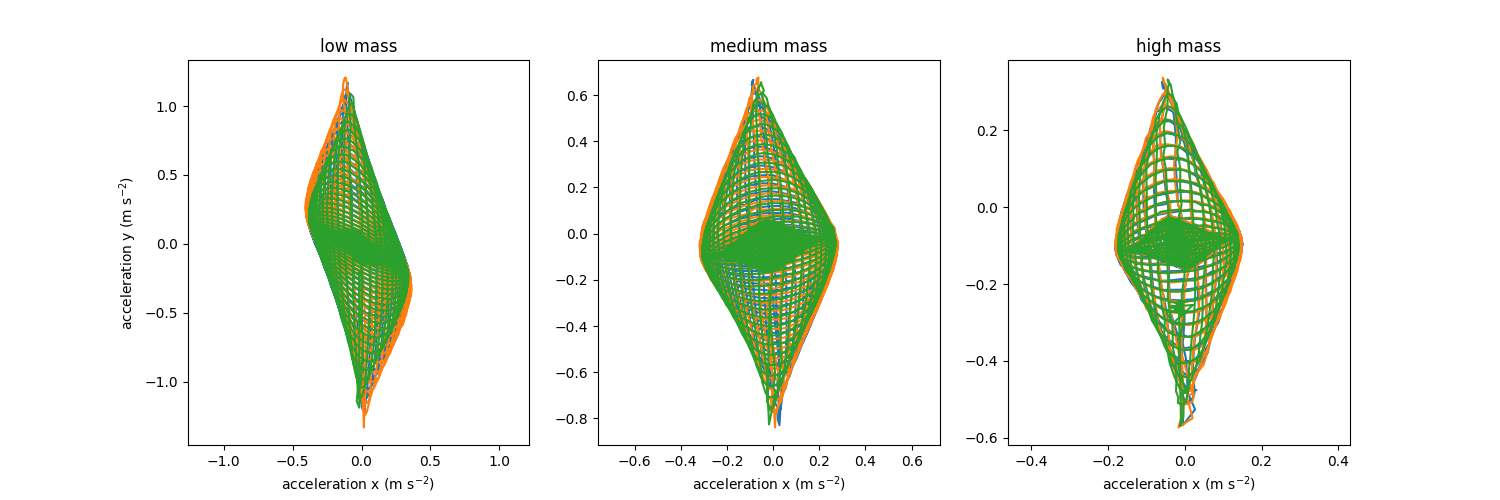

In [255]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3)
[ax1.plot(d.acc_x, d.acc_y) for d in experiments['0-screws']]
[ax2.plot(d.acc_x, d.acc_y) for d in experiments['2-screws']]
[ax3.plot(d.acc_x, d.acc_y) for d in experiments['4-screws']]
ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')
ax1.set_title('low mass')
ax2.set_title('medium mass')
ax3.set_title('high mass')
ax1.set_ylabel('acceleration y (m s$^{-2}$)')
ax1.set_xlabel('acceleration x (m s$^{-2}$)')
ax2.set_xlabel('acceleration x (m s$^{-2}$)')
ax3.set_xlabel('acceleration x (m s$^{-2}$)')
fig.savefig(path.join(results_dir, 'lissajous.png'), dpi=300)